In [ ]:
""" Wheat data exploration """

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import os
os.getcwd()
df = pd.read_csv("wheat.data")
df.shape

(210, 9)

In [3]:
# columns in the data
df.columns

Index(['id', 'area', 'perimeter', 'compactness', 'length', 'width',
       'asymmetry', 'groove', 'wheat_type'],
      dtype='object')

In [6]:
df.dtypes

id               int64
area           float64
perimeter      float64
compactness    float64
length         float64
width          float64
asymmetry      float64
groove         float64
wheat_type      object
dtype: object

In [4]:
# description of data
df.describe()

,id,area,perimeter,compactness,length,width,asymmetry,groove
count,210.000000,210.000000,210.000000,207.000000,210.000000,209.000000,210.000000,206.000000
mean,104.500000,14.847524,14.559286,0.871280,5.563918,3.281440,3.693530,5.407529
std,60.765944,2.909699,1.305959,0.023306,0.719594,0.419907,1.495112,0.532330
min,0.000000,10.590000,12.410000,0.808100,0.818900,2.630000,0.765100,3.485000
25%,52.250000,12.270000,13.450000,0.857700,5.244750,2.956000,2.600250,5.045000
50%,104.500000,14.355000,14.320000,0.873500,5.518000,3.245000,3.599000,5.226000
75%,156.750000,17.305000,15.715000,0.887650,5.979750,3.566000,4.768750,5.879000
max,209.000000,21.180000,17.250000,0.918300,6.675000,5.325000,8.456000,6.735000


In [3]:
# Get a subset of data
# Create a slice from your dataframe and name the variable s1. It should only include the area and perimeter features.
s1 = df[['area', 'perimeter']]
s1.shape

(210, 2)

In [9]:
type(s1)

pandas.core.frame.DataFrame

In [4]:
# Create another slice of from dataframe called it s2 this time. Slice out only the groove and asymmetry features
s2 = df[['groove', 'asymmetry']]
s2.shape

(210, 2)

<Axes: ylabel='Frequency'>

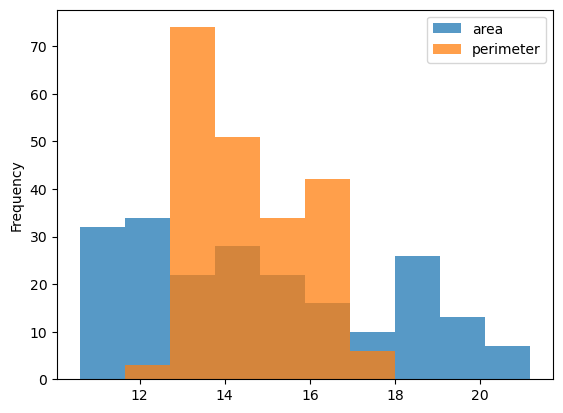

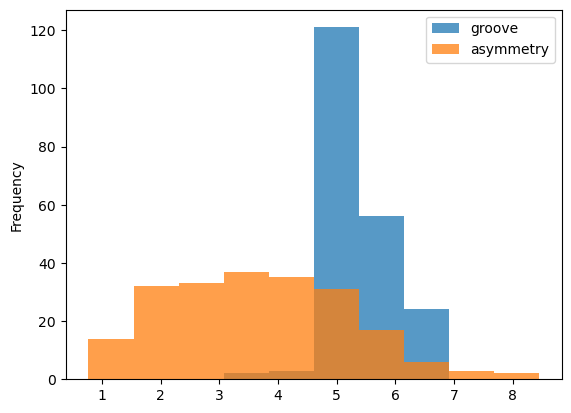

In [5]:
# Create a histogram plot using the first slice, and another histogram plot using the second slice. Be sure to set alpha=0.75
s1.plot.hist(alpha=0.75)
s2.plot.hist(alpha=0.75)

<Axes: xlabel='area', ylabel='perimeter'>

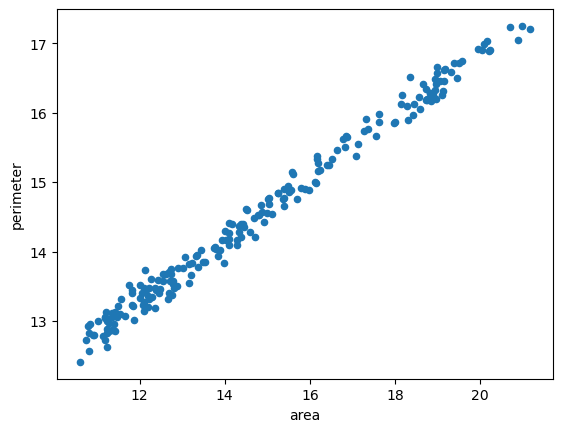

In [12]:
# Scatter plots are a great way to identify corelation betwen features
# Create a scatter plot that graphs the area and perimeter features
s1.plot.scatter(x='area', y='perimeter')

<Axes: xlabel='groove', ylabel='asymmetry'>

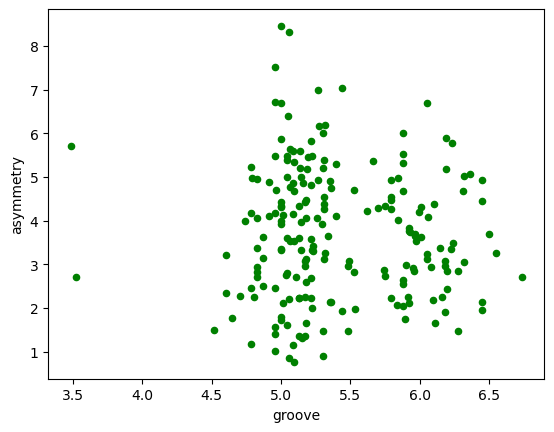

In [17]:
# now create a scatter plot that graphs the groove and asymmetry features
s2.plot.scatter(x='groove', y='asymmetry', color='green')

<Axes: xlabel='compactness', ylabel='width'>

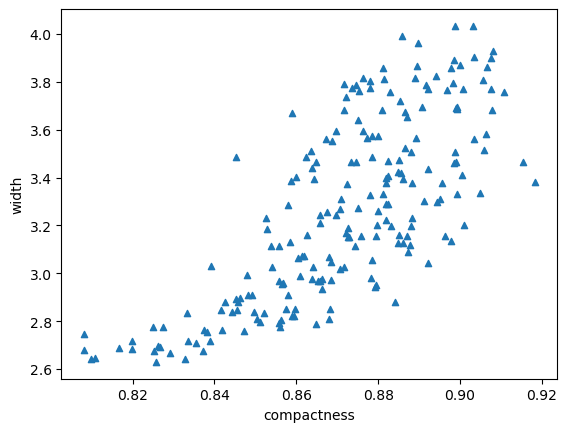

In [16]:
# create a scatter plot that graphs the compactness and width features
s3 = df[['compactness', 'width']]
s3.plot.scatter(x='compactness', y='width', marker='^')

In [19]:
# If you loaded the id column as a feature, then be sure to drop it and also the wheat_type
df2 = df.drop('id', axis=1) # axis = 1 is for column
d = df2.drop('wheat_type', axis=1)
d.shape

(210, 7)

In [21]:
# Compute the correlation matrix of your dataframe
d.dtypes
d.corr()

,area,perimeter,compactness,length,width,asymmetry,groove
area,1.000000,0.994341,0.600312,0.645418,0.801616,-0.205876,0.786096
perimeter,0.994341,1.000000,0.520544,0.657490,0.783188,-0.196360,0.813256
compactness,0.600312,0.520544,1.000000,0.360060,0.756165,-0.315668,0.236184
length,0.645418,0.657490,0.360060,1.000000,0.197228,-0.102325,0.669887
width,0.801616,0.783188,0.756165,0.197228,1.000000,-0.249378,0.619865
asymmetry,-0.205876,-0.196360,-0.315668,-0.102325,-0.249378,1.000000,-0.039248
groove,0.786096,0.813256,0.236184,0.669887,0.619865,-0.039248,1.000000


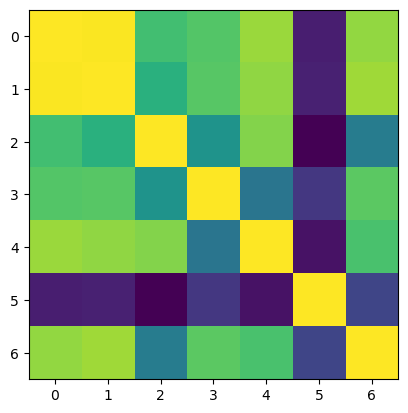

In [22]:
# Graph the correlation matrix using imshow or matshow
plt.imshow(d.corr())

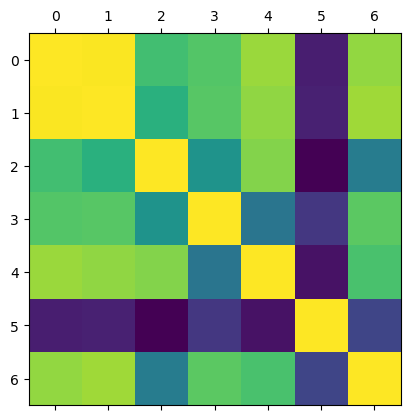

In [23]:
plt.matshow(d.corr())

In [24]:
# what are the different types of wheat
y = df.wheat_type

In [25]:
y.shape

(210,)

In [26]:
type(y)

pandas.core.series.Series

In [27]:
y.value_counts()

wheat_type
canadian    76
rosa        68
kama        66
Name: count, dtype: int64

In [28]:
y.unique()

array(['kama', 'canadian', 'rosa'], dtype=object)

In [36]:
# check if any values in the dataframe are null
df.isnull().any()

id             False
area           False
perimeter      False
compactness     True
length         False
width           True
asymmetry      False
groove          True
wheat_type     False
dtype: bool

In [37]:
# An easy way to show which rows have nans in them:
df[pd.isnull(df).any(axis=1)]

,id,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
7,7,14.11,14.10,0.8911,5.4200,3.302,2.700,NaN,canadian
35,35,16.12,15.00,NaN,0.9000,NaN,5.709,3.485,canadian
60,60,11.42,12.86,0.8683,5.0080,2.850,2.700,NaN,canadian
135,135,15.38,14.66,0.8990,5.4770,3.465,3.600,NaN,canadian
169,169,11.24,13.00,NaN,0.8359,5.090,2.715,3.521,canadian
170,170,11.02,13.00,NaN,0.8189,5.325,2.701,6.735,canadian
201,201,12.67,13.32,0.8977,4.9840,3.135,2.300,NaN,canadian


In [30]:
# Do some basic nan munging. Fill each row's nans with the mean of the feature
df.compactness = df.compactness.fillna(df.compactness.mean())
df.width = df.width.fillna(df.width.mean())
df.groove = df.groove.fillna(df.groove.mean())
df.isnull().any() 

id             False
area           False
perimeter      False
compactness    False
length         False
width          False
asymmetry      False
groove         False
wheat_type     False
dtype: bool

In [31]:
df.describe()

,id,area,perimeter,compactness,length,width,asymmetry,groove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,104.500000,14.847524,14.559286,0.871280,5.563918,3.281440,3.693530,5.407529
std,60.765944,2.909699,1.305959,0.023138,0.719594,0.418901,1.495112,0.527211
min,0.000000,10.590000,12.410000,0.808100,0.818900,2.630000,0.765100,3.485000
25%,52.250000,12.270000,13.450000,0.857925,5.244750,2.957000,2.600250,5.045250
50%,104.500000,14.355000,14.320000,0.873100,5.518000,3.251500,3.599000,5.247000
75%,156.750000,17.305000,15.715000,0.887325,5.979750,3.565250,4.768750,5.878500
max,209.000000,21.180000,17.250000,0.918300,6.675000,5.325000,8.456000,6.735000
